# BIG MART SALES PREDICTION

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats   
import scipy.special 
%matplotlib inline
import matplotlib as mpl
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')
train=pd.read_csv(r"C:\Users\hp\.jupyter\sales\Train.csv")


# EXPLORATORY DATA ANALYSIS

In [2]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>]], dtype=object)

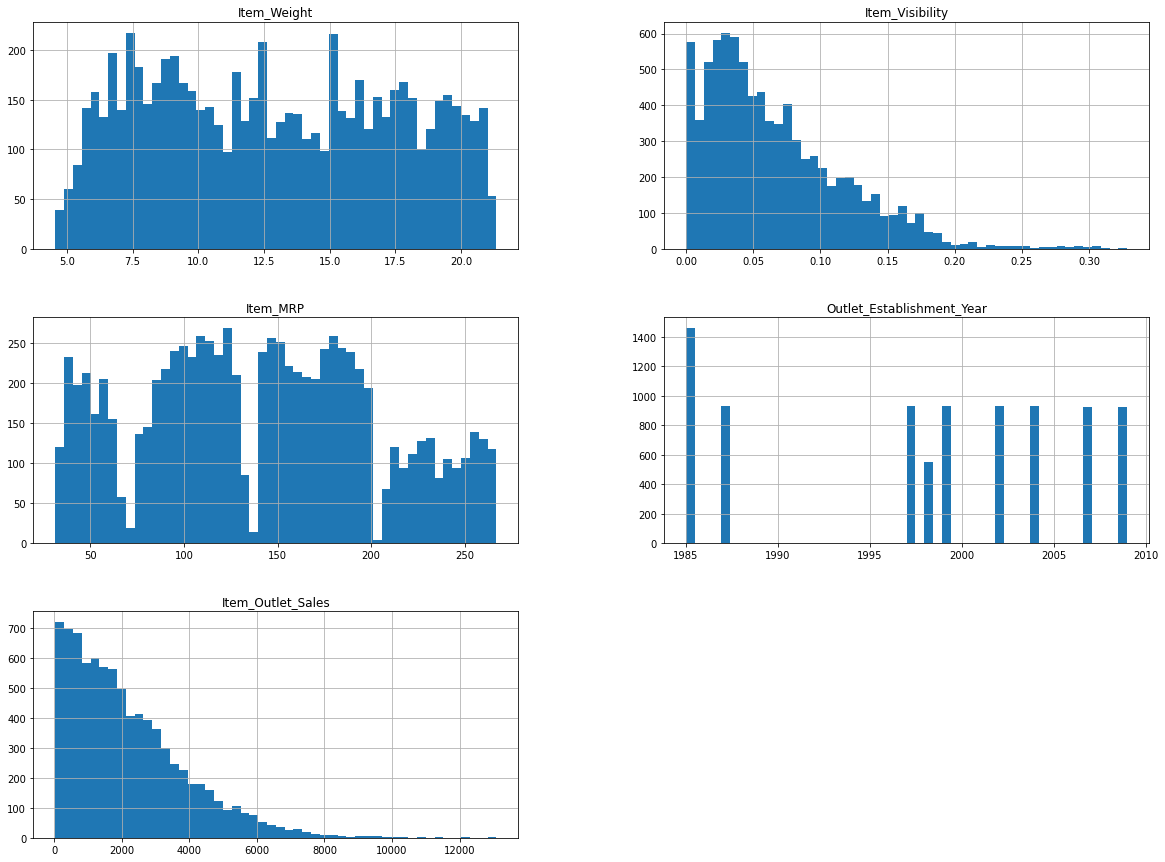

In [3]:
train.hist(bins=50,figsize=(20,15))

In [4]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(train,test_size=0.2,random_state=42)

In [5]:
df=train_set.copy()
data=test_set.copy()
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,5644.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,12.886347,0.066097,141.905134,1997.856850,2202.365231
std,4.644777,0.051429,62.547789,8.395692,1720.024464
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.880000,0.026939,94.175200,1987.000000,851.225300
50%,12.600000,0.054129,144.262800,1999.000000,1808.312800
75%,16.850000,0.094791,186.855600,2004.000000,3123.933600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6818 entries, 549 to 7270
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6818 non-null   object 
 1   Item_Weight                5644 non-null   float64
 2   Item_Fat_Content           6818 non-null   object 
 3   Item_Visibility            6818 non-null   float64
 4   Item_Type                  6818 non-null   object 
 5   Item_MRP                   6818 non-null   float64
 6   Outlet_Identifier          6818 non-null   object 
 7   Outlet_Establishment_Year  6818 non-null   int64  
 8   Outlet_Size                4883 non-null   object 
 9   Outlet_Location_Type       6818 non-null   object 
 10  Outlet_Type                6818 non-null   object 
 11  Item_Outlet_Sales          6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 692.5+ KB


# UNIVARIATE AND BIVARIATE ANALYSIS

In [7]:
corr_matrix=df.corr()

In [8]:
corr_matrix["Item_Outlet_Sales"].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.565303
Item_Weight                  0.007202
Outlet_Establishment_Year   -0.051660
Item_Visibility             -0.136097
Name: Item_Outlet_Sales, dtype: float64

In [9]:
df["Item_Fat_Content"].value_counts()

Low Fat    4035
Regular    2336
LF          267
reg          93
low fat      87
Name: Item_Fat_Content, dtype: int64

In [10]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1002
Snack Foods               971
Household                 744
Frozen Foods              681
Dairy                     536
Canned                    513
Baking Goods              509
Health and Hygiene        409
Soft Drinks               354
Meat                      325
Breads                    190
Hard Drinks               183
Others                    139
Starchy Foods             128
Breakfast                  86
Seafood                    48
Name: Item_Type, dtype: int64

In [11]:
df["Outlet_Size"].value_counts()

Medium    2233
Small     1906
High       744
Name: Outlet_Size, dtype: int64

In [12]:
df["Outlet_Location_Type"].value_counts()

Tier 3    2703
Tier 2    2239
Tier 1    1876
Name: Outlet_Location_Type, dtype: int64

In [13]:
df["Outlet_Type"].value_counts()

Supermarket Type1    4446
Grocery Store         859
Supermarket Type3     761
Supermarket Type2     752
Name: Outlet_Type, dtype: int64

 VISULISATION OF NUMERICAL FEATURES 

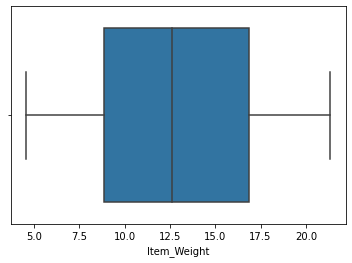

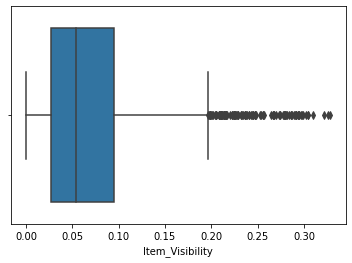

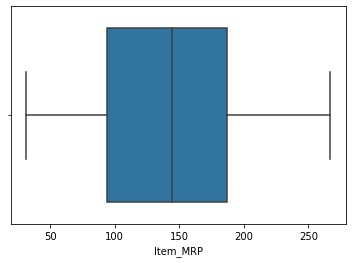

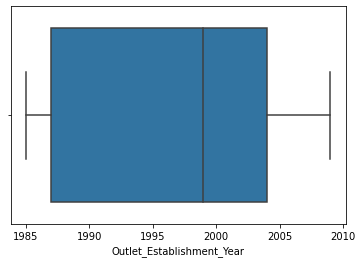

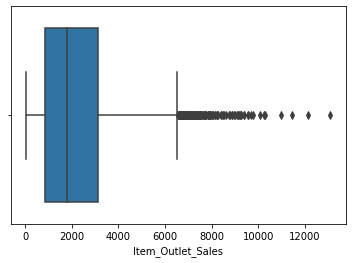

In [14]:
for i in df.describe().columns:
    sns.boxplot(df[i].dropna())
    plt.show()

<AxesSubplot:>

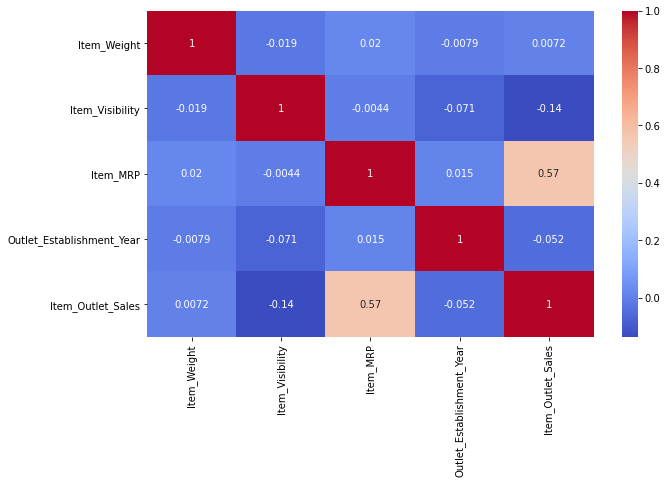

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2g')

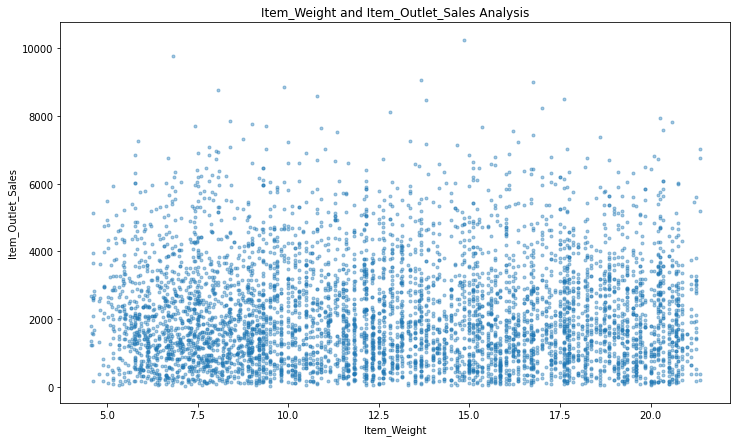

In [16]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(df.Item_Weight, df["Item_Outlet_Sales"],'.', alpha = 0.4)

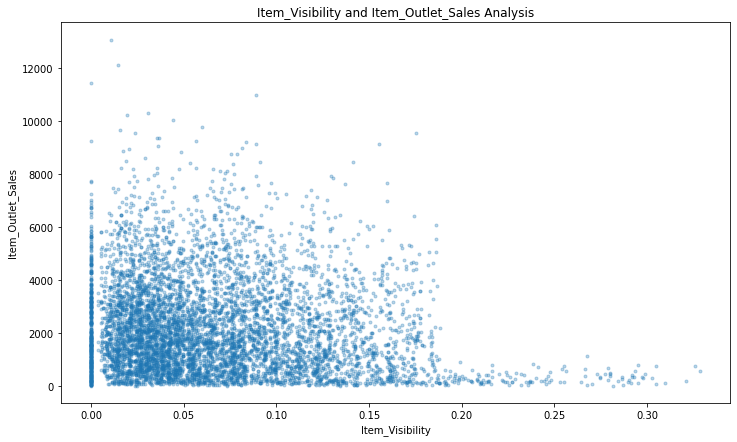

In [17]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(df.Item_Visibility, df["Item_Outlet_Sales"],'.', alpha = 0.3)

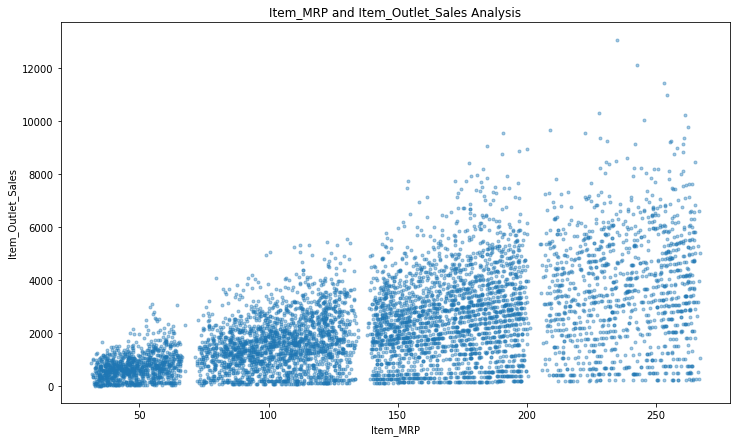

In [18]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_MRP and Item_Outlet_Sales Analysis")
plt.plot(df.Item_MRP, df["Item_Outlet_Sales"],'.', alpha = 0.4)

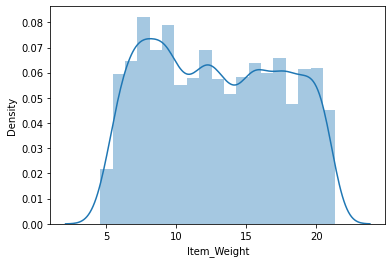

skew = 0.08111700310833264
kurtosis = -1.2281932671396485


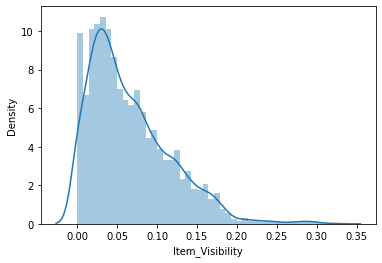

skew = 1.15683247676057
kurtosis = 1.6732946121233065


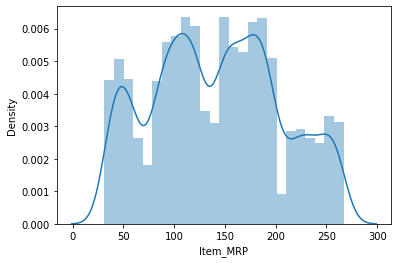

skew = 0.10629754551571569
kurtosis = -0.9034071806332813


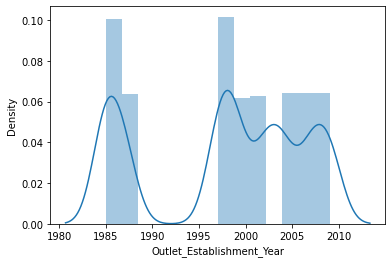

skew = -0.39777038297630707
kurtosis = -1.2118036891670319


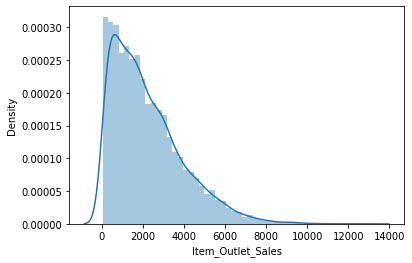

skew = 1.177752487583399
kurtosis = 1.62804114044333


In [19]:

for i in df.describe().columns:
    sns.distplot(df[i].dropna())
    plt.show()
    print('skew =',df[i].skew())
    print('kurtosis =',df[i].kurtosis())

 VISULISATION OF CATEGORICAL FEATURES

In [20]:
category=[feature for feature in df.columns if len(df[feature].unique())<25]
print("category features",len(category))
df[category].head()

category features 7


,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
549,Regular,Fruits and Vegetables,OUT049,1999,Medium,Tier 1,Supermarket Type1
7757,Low Fat,Household,OUT045,2002,NaN,Tier 2,Supermarket Type1
764,Regular,Meat,OUT046,1997,Small,Tier 1,Supermarket Type1
6867,Low Fat,Fruits and Vegetables,OUT045,2002,NaN,Tier 2,Supermarket Type1
2716,Low Fat,Snack Foods,OUT046,1997,Small,Tier 1,Supermarket Type1


In [21]:
df.pivot_table(values='Outlet_Type', columns='Outlet_Identifier',aggfunc=lambda x:x.mode())


Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [22]:
df.pivot_table(values='Outlet_Type', columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


In [23]:
df.pivot_table(values='Outlet_Location_Type', columns='Outlet_Type',aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


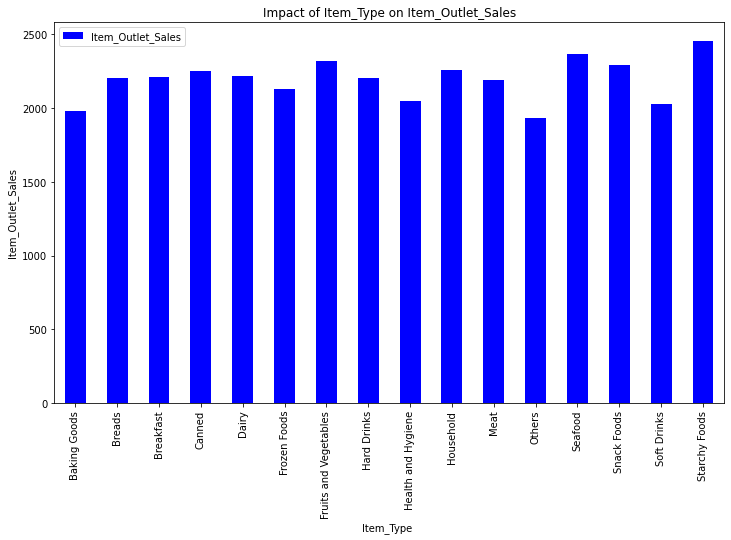

In [24]:
pivoTable = \
df.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.mean)

pivoTable.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Type on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

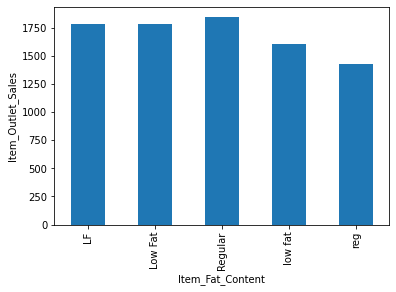

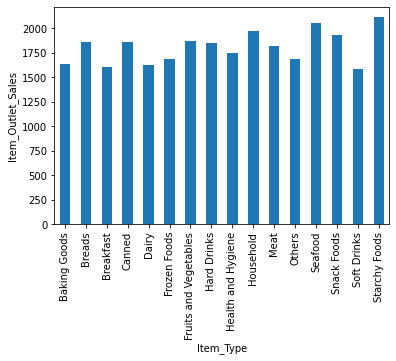

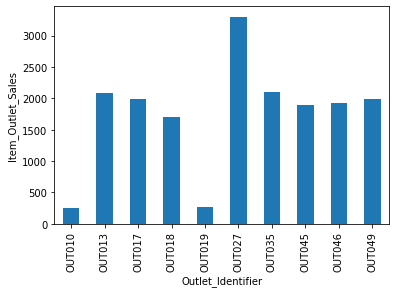

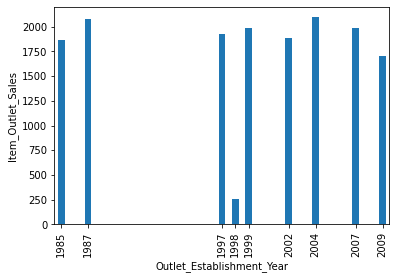

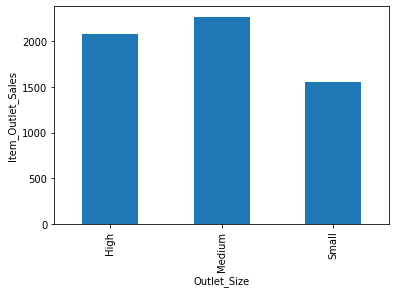

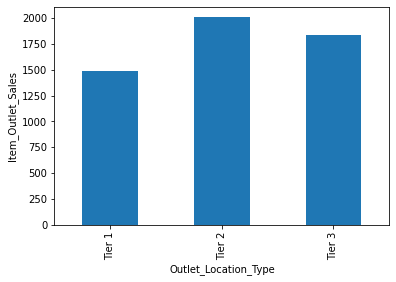

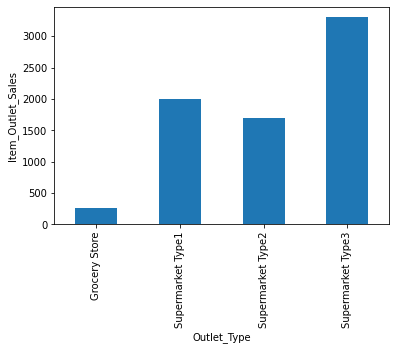

In [25]:


for features in category:
    df.groupby(features)['Item_Outlet_Sales'].median().plot.bar(x="features",y="Item_Outlet_Sales")
    plt.ylabel("Item_Outlet_Sales")
    plt.show()

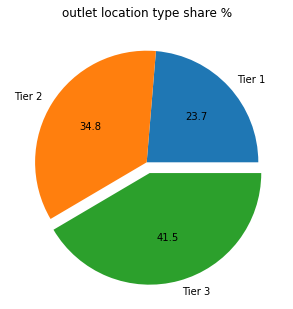

In [26]:
plt.figure(figsize=(5,8))
d_outlet_location = {}


total = df['Item_Outlet_Sales'].sum()


for i in range(df['Outlet_Location_Type'].nunique()):


    c = df['Outlet_Location_Type'].unique()[i]


    c_distribution = df[df['Outlet_Location_Type']==c]['Item_Outlet_Sales'].sum()
    d_outlet_location[c] = c_distribution/total
plt.pie([x*100 for x in d_outlet_location.values()],labels=[x for x in d_outlet_location.keys()],autopct='%0.1f',explode=[0,0,0.1]) 

#label the plot 
plt.title('outlet location type share %') 
 
plt.show()

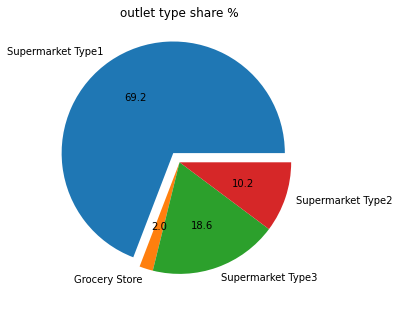

In [27]:
plt.figure(figsize=(5,8))
d_outlet = {}


total = df['Item_Outlet_Sales'].sum()


for i in range(df['Outlet_Type'].nunique()):


    c = df['Outlet_Type'].unique()[i]


    c_distribution = df[df['Outlet_Type']==c]['Item_Outlet_Sales'].sum()
    d_outlet[c] = c_distribution/total
plt.pie([x*100 for x in d_outlet.values()],labels=[x for x in d_outlet.keys()],autopct='%0.1f',explode=[0.1,0,0,0]) 

#label the plot 
plt.title('outlet type share %') 
 
plt.show()

# DATA PREPROCESSING AND TRANSFORMATIONS

1.MISSING VALUES TREATMENT

In [28]:
median=df["Item_Weight"].median()
df["Item_Weight"].fillna(median, inplace=True)

In [29]:
median=data["Item_Weight"].median()
data["Item_Weight"].fillna(median, inplace=True)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

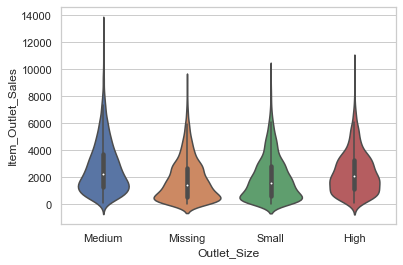

In [30]:
dataset=df.copy()
dataset['Outlet_Size']=dataset['Outlet_Size'].fillna('Missing')
sns.set(style = 'whitegrid') 
sns.violinplot(x =dataset['Outlet_Size'], y =dataset['Item_Outlet_Sales'], data =dataset)

In [31]:
frequent=df['Outlet_Size'][764]
df['Outlet_Size'].fillna(frequent,inplace=True)

In [32]:
frequent=data['Outlet_Size'][856]
data['Outlet_Size'].fillna(frequent,inplace=True)

In [33]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [34]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# 2.FEATURE ENGINEERING 

Item_Type_Combined

In [35]:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
df['Item_Type_Combined'] =df['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
df['Item_Type_Combined'].value_counts()

Food              4887
Non-Consumable    1292
Drinks             639
Name: Item_Type_Combined, dtype: int64

In [36]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] =data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              1238
Non-Consumable     307
Drinks             160
Name: Item_Type_Combined, dtype: int64

ITEM_FAT_CONTENT

In [37]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg','Regular')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('low fat','Low Fat')

In [38]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace('LF','Low Fat')
data['Item_Fat_Content']=data['Item_Fat_Content'].replace('reg','Regular')
data['Item_Fat_Content']=data['Item_Fat_Content'].replace('low fat','Low Fat')

In [39]:
df.loc[df['Item_Type_Combined'] == "Non-Consumable", "Item_Fat_Content"] = "Non-Edible"
df['Item_Fat_Content'].value_counts()

Low Fat       3097
Regular       2429
Non-Edible    1292
Name: Item_Fat_Content, dtype: int64

In [40]:
data.loc[data['Item_Type_Combined'] == "Non-Consumable", "Item_Fat_Content"] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       821
Regular       577
Non-Edible    307
Name: Item_Fat_Content, dtype: int64

ITEM_VISIBILITY


In [41]:
df['Item_Visibility']=df['Item_Visibility'].replace(0,np.median(df['Item_Visibility']))

In [42]:
data['Item_Visibility']=data['Item_Visibility'].replace(0,np.median(data['Item_Visibility']))

OUTLET_YEARS

In [43]:
df['Outlet_Years']=2013-df['Outlet_Establishment_Year']

In [44]:
data['Outlet_Years']=2013-data['Outlet_Establishment_Year']

PRICE_PER_WEIGHT

In [45]:
df['price_per_weight']=df['Item_MRP']//df["Item_Weight"]

In [46]:
data['price_per_weight']=data['Item_MRP']//data["Item_Weight"]

# 3. FEATURES ENCODING

ITEM_MRP

In [47]:
df.loc[df['Item_MRP'] <= 70, 'Item_MRP'] = 1
df.loc[(df['Item_MRP'] > 70) & (df['Item_MRP'] <= 140), 'Item_MRP'] = 2
df.loc[(df['Item_MRP'] > 140) & (df['Item_MRP'] <= 210), 'Item_MRP']   = 3
df.loc[ df['Item_MRP'] > 210, 'Item_MRP'] = 4
df['Item_MRP'] = df['Item_MRP'].astype(int)

In [48]:
data.loc[data['Item_MRP'] <= 70, 'Item_MRP'] = 1
data.loc[(data['Item_MRP'] > 70) & (data['Item_MRP'] <= 140), 'Item_MRP'] = 2
data.loc[(data['Item_MRP'] > 140) & (data['Item_MRP'] <= 210), 'Item_MRP']   = 3
data.loc[ data['Item_MRP'] > 210, 'Item_MRP'] = 4
data['Item_MRP'] = data['Item_MRP'].astype(int)

OUTLET_SIZE

In [49]:
Ordinal_dict={'Small':0,'Medium':1,'High':2}
df['Outlet_Encoded']=df.Outlet_Size.map(Ordinal_dict)

In [50]:
Ordinal_dict={'Small':0,'Medium':1,'High':2}
data['Outlet_Encoded']=data.Outlet_Size.map(Ordinal_dict)

OUTLET_LOCATION_TYPE

In [51]:
Order_dict={'Tier 3':0,'Tier 2':1,'Tier 1':2}
df['Outlet_Location_Type']=df.Outlet_Location_Type.map(Order_dict)

In [52]:
Order_dict={'Tier 3':0,'Tier 2':1,'Tier 1':2}
data['Outlet_Location_Type']=data.Outlet_Location_Type.map(Order_dict)

# SKEWED FEATURES TRANSFORMATION

ITEM_VISIBILITY_SQRT

skew = 0.44643051050822036
kurtosis = -0.143964549230025


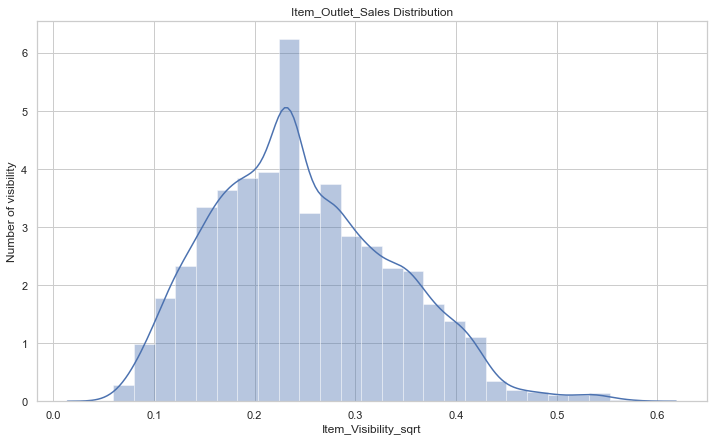

In [53]:
df['Item_Visibility_sqrt']=np.sqrt(df['Item_Visibility'])
plt.figure(figsize=(12,7))
sns.distplot(df['Item_Visibility_sqrt'], bins = 25)
plt.xlabel('Item_Visibility_sqrt')
plt.ylabel("Number of visibility")
plt.title("Item_Outlet_Sales Distribution")
print('skew =',df['Item_Visibility_sqrt'].skew())
print('kurtosis =',df['Item_Visibility_sqrt'].kurtosis())

skew = 0.4936661843362624
kurtosis = -0.11586696226116544


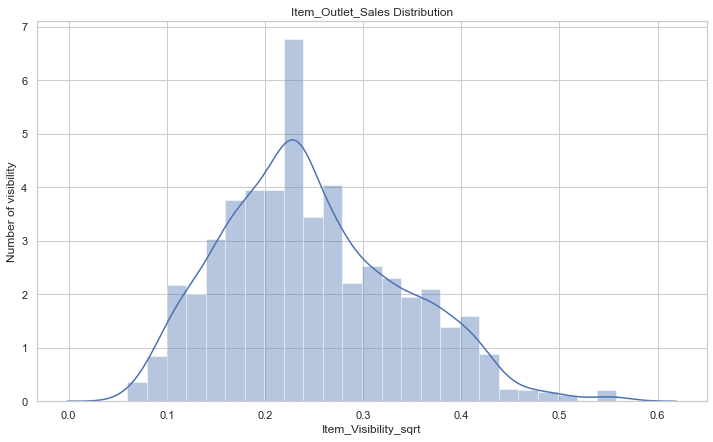

In [54]:
data['Item_Visibility_sqrt']=np.sqrt(data['Item_Visibility'])
plt.figure(figsize=(12,7))
sns.distplot(data['Item_Visibility_sqrt'], bins = 25)
plt.xlabel('Item_Visibility_sqrt')
plt.ylabel("Number of visibility")
plt.title("Item_Outlet_Sales Distribution")
print('skew =',data['Item_Visibility_sqrt'].skew())
print('kurtosis =',data['Item_Visibility_sqrt'].kurtosis())

PRICE_PER_WEIGHT_SQRT

skew = 0.4134586317256532
kurtosis = 0.08836817457087154


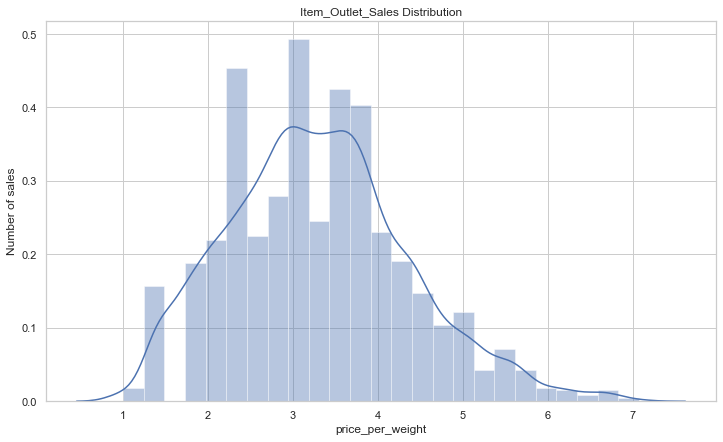

In [55]:
df['price_per_weight_unt']=np.sqrt(df['price_per_weight'])
plt.figure(figsize=(12,7))
sns.distplot(df['price_per_weight_unt'], bins = 25)
plt.xlabel('price_per_weight')
plt.ylabel("Number of sales")
plt.title("Item_Outlet_Sales Distribution")
print('skew =',df['price_per_weight_unt'].skew())
print('kurtosis =',df['price_per_weight_unt'].kurtosis())

skew = 0.41772345327011784
kurtosis = 0.0021630377455319483


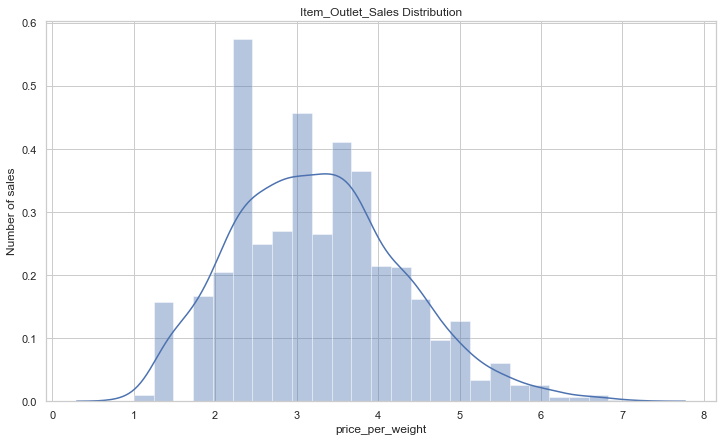

In [56]:
data['price_per_weight_unt']=np.sqrt(data['price_per_weight'])
plt.figure(figsize=(12,7))
sns.distplot(data['price_per_weight_unt'], bins = 25)
plt.xlabel('price_per_weight')
plt.ylabel("Number of sales")
plt.title("Item_Outlet_Sales Distribution")
print('skew =',data['price_per_weight_unt'].skew())
print('kurtosis =',data['price_per_weight_unt'].kurtosis())

ITEM_OUTLET_SALES

skew = 0.23545913123254336
kurtosis = -0.44571597719003275


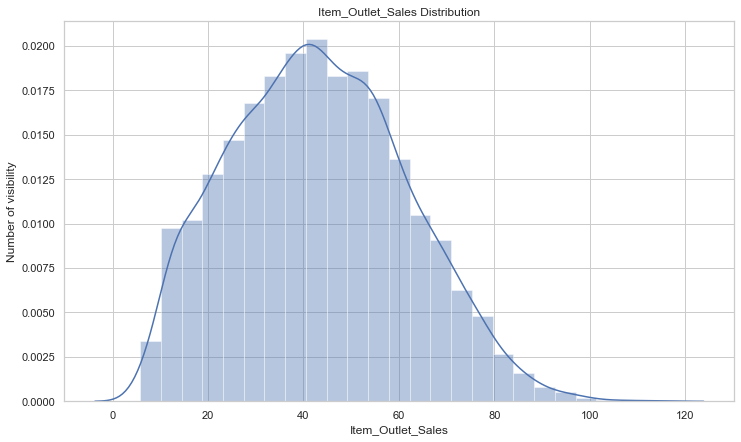

In [57]:
df['Item_Outlet_Sales_sqrt']=np.sqrt(df['Item_Outlet_Sales'])
plt.figure(figsize=(12,7))
sns.distplot(df['Item_Outlet_Sales_sqrt'], bins = 25)
plt.xlabel('Item_Outlet_Sales')
plt.ylabel("Number of visibility")
plt.title("Item_Outlet_Sales Distribution")
print('skew =',df['Item_Outlet_Sales_sqrt'].skew())
print('kurtosis =',df['Item_Outlet_Sales_sqrt'].kurtosis())

skew = 0.22811681547782287
kurtosis = -0.47043330738526423


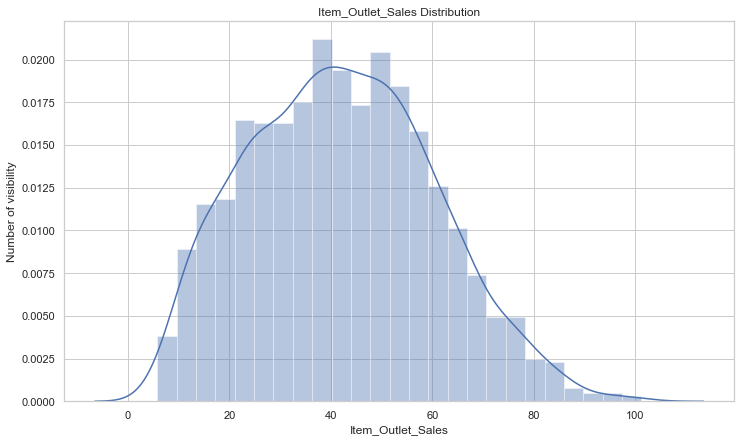

In [58]:
data['Item_Outlet_Sales_sqrt']=np.sqrt(data['Item_Outlet_Sales'])
plt.figure(figsize=(12,7))
sns.distplot(data['Item_Outlet_Sales_sqrt'], bins = 25)
plt.xlabel('Item_Outlet_Sales')
plt.ylabel("Number of visibility")
plt.title("Item_Outlet_Sales Distribution")
print('skew =',data['Item_Outlet_Sales_sqrt'].skew())
print('kurtosis =',data['Item_Outlet_Sales_sqrt'].kurtosis())

# FEATURES SELECTION

In [59]:
features_drop=["Item_Identifier","Item_Type","Outlet_Identifier","Outlet_Establishment_Year","Outlet_Size",
               "Item_Visibility","price_per_weight","Item_Outlet_Sales"]
df=df.drop(features_drop,axis=1)

In [60]:
data=data.drop(features_drop,axis=1)

In [61]:
df.head()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Outlet_Years,Outlet_Encoded,Item_Visibility_sqrt,price_per_weight_unt,Item_Outlet_Sales_sqrt
549,9.500,Regular,3,2,Supermarket Type1,Food,14,1,0.187632,4.242641,48.849025
7757,18.000,Non-Edible,3,1,Supermarket Type1,Non-Consumable,11,0,0.217883,3.000000,55.713191
764,17.600,Regular,2,2,Supermarket Type1,Food,16,0,0.275902,2.449490,33.544031
6867,8.325,Low Fat,1,1,Supermarket Type1,Food,11,0,0.172758,2.000000,16.861097
2716,12.850,Low Fat,3,2,Supermarket Type1,Food,16,0,0.370443,3.464102,64.996161


In [62]:
data.head()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Outlet_Years,Outlet_Encoded,Item_Visibility_sqrt,price_per_weight_unt,Item_Outlet_Sales_sqrt
7503,14.300,Low Fat,2,0,Supermarket Type1,Food,26,2,0.162172,2.236068,41.750023
2957,7.930,Non-Edible,1,2,Supermarket Type1,Non-Consumable,16,0,0.266713,2.236068,18.890971
7031,14.500,Regular,1,2,Supermarket Type1,Food,14,1,0.203256,1.414214,19.429581
1084,12.500,Regular,3,0,Supermarket Type3,Drinks,28,1,0.211582,3.605551,76.016302
856,10.195,Regular,3,1,Supermarket Type1,Food,9,0,0.111605,4.358899,48.548244


In [63]:
X_train=df.drop('Item_Outlet_Sales_sqrt',axis=1)
y_train=df['Item_Outlet_Sales_sqrt']
X_test=data.drop('Item_Outlet_Sales_sqrt',axis=1)
y_test=data['Item_Outlet_Sales_sqrt']

# FEATURE SCALING AND PIPELINE

In [64]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

In [65]:
num_attribs=['Item_Weight','Item_MRP','Outlet_Years','Item_Visibility_sqrt','price_per_weight_unt']
onehot_Encoder_cate=['Item_Type_Combined','Item_Fat_Content']
order_cat=['Outlet_Type']
num_pipeline = Pipeline([
                    ('imputer', SimpleImputer(strategy="median")),
                    ('std_scaler', StandardScaler())])

full_pipeline=ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",OneHotEncoder(sparse=False),onehot_Encoder_cate),
    ("ordercat",OrdinalEncoder(),order_cat)
    ],remainder='passthrough')
X_train = full_pipeline.fit_transform(X_train)

In [66]:
X_train

array([[-0.78945628,  0.49513825, -0.13616916, ...,  1.        ,
         2.        ,  1.        ],
       [ 1.22142058,  0.49513825, -0.49352147, ...,  1.        ,
         1.        ,  0.        ],
       [ 1.12679108, -0.56511696,  0.10206572, ...,  1.        ,
         2.        ,  0.        ],
       ...,
       [ 1.12679108,  1.55539347, -0.49352147, ...,  1.        ,
         1.        ,  0.        ],
       [ 1.77736889, -0.56511696, -1.08910867, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.8310739 , -0.56511696,  0.10206572, ...,  1.        ,
         2.        ,  0.        ]])

In [67]:
X_test=full_pipeline.transform(X_test)

In [68]:
X_test

array([[ 0.34609771, -0.56511696,  1.29324011, ...,  1.        ,
         0.        ,  2.        ],
       [-1.16087706, -1.62537218,  0.10206572, ...,  1.        ,
         2.        ,  0.        ],
       [ 0.39341246, -1.62537218, -0.13616916, ...,  1.        ,
         2.        ,  1.        ],
       ...,
       [ 0.39341246, -1.62537218,  1.29324011, ...,  1.        ,
         0.        ,  2.        ],
       [-0.71848415, -1.62537218, -1.32734355, ...,  2.        ,
         0.        ,  1.        ],
       [-1.16679141, -0.56511696, -0.49352147, ...,  1.        ,
         1.        ,  0.        ]])

# TRAINING AND MODEL BUILDING

# Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  r2_score
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence


lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [70]:
sales_prediction=lin_reg.predict(X_train)
lin_mse=mean_squared_error(y_train,sales_prediction)
lin_rmse=np.sqrt(lin_mse)
lin_rmse,lin_mse

(12.361077985206988, 152.79624895636886)

In [71]:
scores=cross_val_score(lin_reg,X_train,y_train,scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)
print("Mean:\t\t ", rmse_scores.mean(), "\nStandard Deviation:", rmse_scores.std())

Mean:		  12.379968329667435 
Standard Deviation: 0.35613797313574735


Text(0.5, 0, 'Predicted Y')

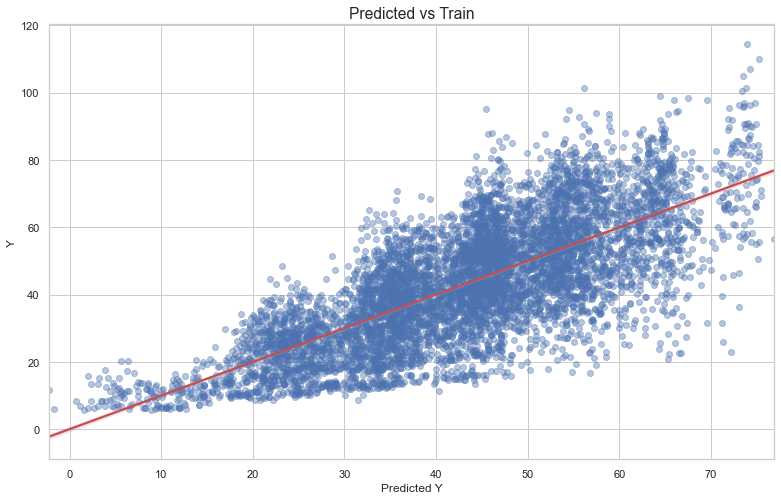

In [72]:
residuals_train=y_train-sales_prediction

plt.figure(figsize=(13,8))

sns.set(style="whitegrid")

sns.regplot(sales_prediction,y_train,scatter_kws={'color':'b','alpha':0.4},color='r')
sns.set(font_scale=1.3)
plt.title('Predicted vs Train')
plt.ylabel('Y')
plt.xlabel('Predicted Y')

In [73]:
r2_score(y_train, sales_prediction)

0.5491222086302869

In [74]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(0.1)
lasso_reg.fit(X_train, y_train)
lasso_predict=lasso_reg.predict(X_train)
lasso_mse=mean_squared_error(y_train,lasso_predict)
lasso_rmse=np.sqrt(lasso_mse)
lasso_rmse,lasso_mse

(12.372635808049935, 153.08211683863948)

# SVM MODEL

In [75]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X_train, y_train)

LinearSVR(epsilon=1.5, random_state=42)

In [76]:
svm_prediction=svm_reg.predict(X_train)
svm_mse = mean_squared_error(y_train, svm_prediction)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

12.37422584474904

In [77]:
svm_poly_reg = SVR(kernel="rbf",  C=100,  gamma=0.1)
svm_poly_reg.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

In [78]:
svr_pred=svm_poly_reg.predict(X_train)
svr_mse = mean_squared_error(y_train, svr_pred)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

10.242851457806212

In [79]:
svm_scores = cross_val_score(svm_poly_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-svm_scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


display_scores(svm_rmse_scores)

Scores: [11.36368112 10.36400567 10.89539953 10.93247544 11.03392679 11.28015842
 11.09514177 10.6102339  10.84530624 11.39203306]
Mean: 10.981236191902441
Standard deviation: 0.3109601563393414


# DECISION TREE MODEL

In [80]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth= 6, max_leaf_nodes= 100, min_samples_leaf= 50, min_samples_split= 10,random_state=42)#max_depth=6,max_leaf_nodes=50,min_samples_split=125,random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=100, min_samples_leaf=50,
                      min_samples_split=10, random_state=42)

In [81]:
tree_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

10.688841140037391

In [82]:
r2_score(y_train, tree_predictions)

0.6628622404576815

In [83]:
tree_prediction = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

10.25561189449081

In [84]:
r2_score(y_test, tree_prediction)

0.6799575964608432

# RANDOM FOREST MODEL

In [85]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators= 1200,min_samples_split= 15,min_samples_leaf= 8,max_depth= 10,random_state=42)#bootstrap= True,n_estimators =400,min_samples_split= 25,min_samples_leaf= 10,max_depth= 6,n_jobs=-1, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=15,
                      n_estimators=1200, random_state=42)

In [86]:
forest_predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

9.821001656164801

In [87]:
r2_score(y_train, forest_predictions)

0.7153850426077522

In [88]:
forest_prediction = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_prediction)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

10.20850430227561

In [89]:
r2_score(y_test, forest_prediction)

0.6828909760691686

# EXTRA TREE REGRESOR

In [90]:
from sklearn.ensemble import ExtraTreesRegressor
ex=ExtraTreesRegressor(n_estimators=800,max_depth=12,min_samples_split=20, min_samples_leaf=25,n_jobs=-1,random_state=42)
ex.fit(X_train,y_train)

ExtraTreesRegressor(max_depth=12, min_samples_leaf=25, min_samples_split=20,
                    n_estimators=800, n_jobs=-1, random_state=42)

In [91]:
extra_predictions=ex.predict(X_train)
extra_mse=mean_squared_error(y_train,extra_predictions)
extra_rmse=np.sqrt(extra_mse)
extra_rmse,extra_mse

(10.361683731073553, 107.36448974279433)

In [92]:
r2_score(y_train, extra_predictions)

0.6831842120640648

In [93]:
extra_prediction=ex.predict(X_test)
extra_mse=mean_squared_error(y_test,extra_prediction)
extra_rmse=np.sqrt(extra_mse)
extra_rmse,extra_mse

(10.190098962653906, 103.83811686868022)

In [94]:
r2_score(y_test, extra_prediction)

0.6840334035346398

<AxesSubplot:xlabel='Item_Outlet_Sales_sqrt', ylabel='Density'>

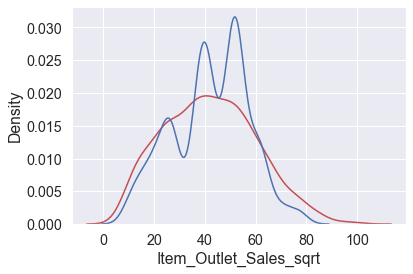

In [95]:
ax1=sns.distplot(y_test,hist=False,color='r',label="ACTUAL VALUE")
sns.distplot(extra_prediction,hist=False,color='b',label="fiited VALUE",ax=ax1)


<AxesSubplot:xlabel='Item_Outlet_Sales_sqrt', ylabel='Density'>

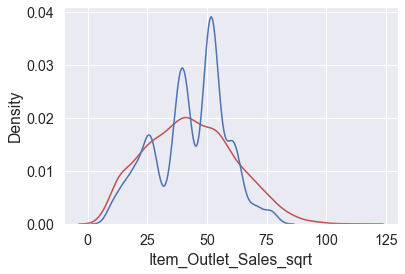

In [96]:
ax1=sns.distplot(y_train,hist=False,color='r',label="ACTUAL VALUE")
sns.distplot(extra_predictions,hist=False,color='b',label="fiited VALUE",ax=ax1)

# XG BOOST

In [97]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from xgboost import XGBRegressor


model = XGBRegressor(learning_rate =0.1,n_estimators=100, max_depth=4,min_child_weight=6,subsample=0.8,
                     colsample_bytree=0.9,random_state=42 )

model.fit(X_train, y_train)
yhat = model.predict(X_train)
xg_mse = mean_squared_error(y_train, yhat)
xg_rmse = np.sqrt(xg_mse)
xg_rmse

10.089278777260855

In [98]:
yhats = model.predict(X_test)
xg_mse = mean_squared_error(y_test, yhats)
xg_rmse = np.sqrt(xg_mse)
xg_rmse

10.181368299964905

In [99]:
print('Test score-->',r2_score(y_test, yhats))
print('Train score-->',r2_score(y_train, yhat))

Test score--> 0.6845745986752425
Train score--> 0.6996231934995263


# SAVE MODEL

In [111]:
import joblib
joblib.dump(model,r'C:\Users\hp\BIGMARTSALE\MODEL/XGBOOST.pkl')
joblib.dump(model,r'C:\Users\hp\BIGMARTSALE\MODEL/XGBOOST.sav')

['C:\\Users\\hp\\BIGMARTSALE\\MODEL/XGBOOST.sav']

In [100]:
print(model.feature_importances_)

[0.00734788 0.24497567 0.05100243 0.00615759 0.02183364 0.00470848
 0.00380129 0.00378395 0.00606654 0.00079243 0.00541793 0.61506784
 0.01061219 0.01843216]


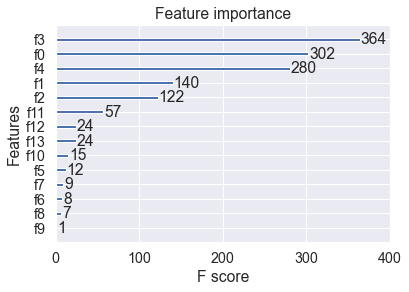

In [101]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(model)
pyplot.show()

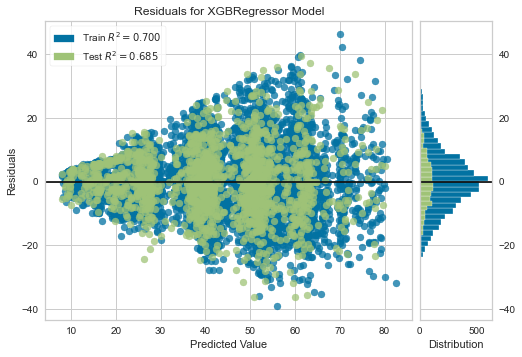

In [102]:
import xgboost as xgb
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error
viz = residuals_plot(model, X_train, y_train, X_test, y_test)

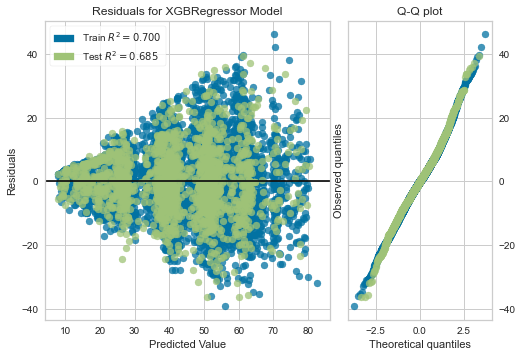

<AxesSubplot:title={'center':'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [103]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

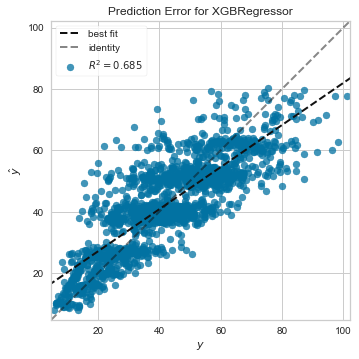

<AxesSubplot:title={'center':'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [104]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()       

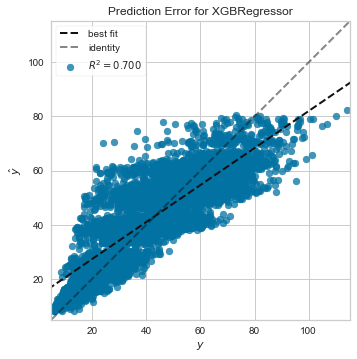

<AxesSubplot:title={'center':'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [105]:
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_train, y_train)  # Evaluate the model on the test data
visualizer.show()       

# HYPER PARAMETER TUNING

In [106]:
from sklearn.model_selection import GridSearchCV
param_grid = {"min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

## Comment in order to publish in kaggle.

grid_cv_dtm = GridSearchCV(tree_reg, param_grid, cv=5)

grid_cv_dtm.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=6, max_leaf_nodes=100,
                                             min_samples_leaf=50,
                                             min_samples_split=10,
                                             random_state=42),
             param_grid={'max_depth': [2, 6, 8], 'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [107]:
print(grid_cv_dtm.best_params_)
print(-grid_cv_dtm.best_score_)

{'max_depth': 6, 'max_leaf_nodes': 20, 'min_samples_leaf': 40, 'min_samples_split': 10}
-0.6525077467677214


In [108]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()

param_grid = [{'n_estimators': [10, 25,100], 'max_features': [5,8, 11],  'max_depth': [10, 50, None], 'bootstrap': [True, False]}]

grid_search_forest = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None],
                          'max_features': [5, 8, 11],
                          'n_estimators': [10, 25, 100]}],
             scoring='neg_mean_squared_error')

In [109]:
grid_search_forest.best_params_

{'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 100}

In [110]:
grid_search_forest.best_score_

-118.20061145936847